In [438]:
import numpy as np
import pandas as pd

In [439]:
users=pd.read_json("data/customers.json")
users.columns = ["user_id",'username']
users

,user_id,username
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [440]:
products=pd.read_json("data/products.json")
products.columns = ["product_id","product_name","price"]
products

,product_id,product_name,price
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0
...,...,...,...
686,687,Bird Box,1.0
687,688,Snowpiercer,2.0
688,689,Edge of Tomorrow,1.0
689,690,Ponyo,3.0


In [441]:
ratings=pd.read_json("data/ratings.json")
ratings.drop("CreateDate",inplace = True, axis=1)
ratings.columns = ["user_id","product_id","rating"]
ratings

,user_id,product_id,rating
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5
...,...,...,...
130749,103907,501,1
130750,103907,200,1
130751,103907,184,1
130752,103907,211,1


In [442]:
ratings =  pd.merge(ratings, products, on='product_id',how="outer")

After I have merge, from my observation, there are many duplicates. Means that a user rate the same product different time. Because our dataset is pretty large (139.000), we can drop these duplicates instead of doing anything about it, without worrying it will affect our judgement (I gain such a knowledge from doing music recommendation :v very helpful indeed). Removing these dupliates avoid biases I believe

In [443]:
ratings = ratings.drop_duplicates(['user_id', 'product_id'])

In [444]:
ratings

,user_id,product_id,rating,product_name,price
0,103416,619,1,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
1,103401,619,4,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
2,103491,619,1,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
3,103856,619,4,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
4,103320,619,4,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
...,...,...,...,...,...
130747,103896,236,5,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130748,103699,236,4,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130749,103890,236,4,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130751,103970,236,3,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0


# Non personalized recommendation

In [445]:
product_popularity = ratings["product_id"].value_counts()
print(product_popularity)

product_id
238    178
195    171
332    170
176    170
558    169
      ... 
308    128
552    128
22     127
304    127
76     124
Name: count, Length: 691, dtype: int64


In [446]:
average_rating_df = ratings[["product_id", "rating"]].groupby('product_id').mean()
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)
print(sorted_average_ratings)

              rating
product_id          
96          3.405405
33          3.402439
606         3.397351
78          3.391892
458         3.386207
...              ...
674         2.891892
684         2.885350
669         2.879433
406         2.839161
537         2.810458

[691 rows x 1 columns]


However, we can't not simply base on the rating as it will not fully encapsulate the user's review. Therefore, we must do something about it by setting a threshold, I will use the frequency of 150 as threshold as the mean of our dataset is 190

In [447]:
# Create a list of only products appearing > 150 times in the dataset
product_popularity = ratings["product_id"].value_counts()
popular_product = product_popularity[product_popularity > 150].index
print(popular_product)

Index([238, 195, 332, 176, 558, 454, 326, 146, 604, 455,
       ...
       585, 236, 518,  34, 683, 571, 110, 508, 166, 213],
      dtype='int64', name='product_id', length=307)


In [448]:
popular_product_ranking = ratings[ratings["product_id"].isin(popular_product)]
print(popular_product_ranking)

        user_id  product_id  rating  \
0        103416         619       1   
1        103401         619       4   
2        103491         619       1   
3        103856         619       4   
4        103320         619       4   
...         ...         ...     ...   
130747   103896         236       5   
130748   103699         236       4   
130749   103890         236       4   
130751   103970         236       3   
130752   103541         236       3   

                                             product_name   price  
0       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
1       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
2       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
3       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
4       Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...  1049.0  
...                                                   ...     ...  
130747  Black & White Diamond Promise Ring 1/6 ct tw S.

In [449]:
popular_average_rating_df = popular_product_ranking[["product_id","rating"]].groupby("product_id").mean()
sorted_popular_average_rating_df = popular_average_rating_df.sort_values(by="rating",ascending=False).head()
print(sorted_popular_average_rating_df)

              rating
product_id          
33          3.402439
606         3.397351
426         3.357143
93          3.341935
421         3.339869


After setting the threshold, now we see that product_id 33, 606 and 426 are the one that have highest rating. We will suggest these products to our users.

# Non personalized suggestions

Although we have find the most liked products, we still haven't access users's experience: the previous item they sell might reflect their experience selling the next products. We will make suggestions by finding the most commonly seen together items. We will use permutations to find all pairs of products retail by the same users.

In [450]:
users = pd.merge(users, ratings, on='user_id',how="outer")
users

,user_id,username,product_id,rating,product_name,price
0,103603,1000kgthanh,619.0,4.0,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.00
1,103603,1000kgthanh,411.0,4.0,Diamond Heart Necklace 1/10 ct tw Round-Cut 10...,299.99
2,103603,1000kgthanh,361.0,4.0,Neil Lane Diamond Wedding Band 1/4 ct tw 14K W...,719.99
3,103603,1000kgthanh,481.0,4.0,Amethyst Heart Necklace Tanzanites & Diamonds ...,599.99
4,103603,1000kgthanh,41.0,4.0,Flower Girl Bracelet,360.00
...,...,...,...,...,...,...
103526,103957,zHeroNguyen,515.0,2.0,Forever Connected Diamond Necklace 1/5 ct tw R...,399.99
103527,103957,zHeroNguyen,363.0,4.0,Stackable Ring Lab-Created Pink Sapphire Sterl...,149.99
103528,103957,zHeroNguyen,302.0,2.0,Diamond Ring 1/2 ct tw Round-cut 10K White Gold,999.00
103529,103957,zHeroNguyen,499.0,2.0,Le Vian Morganite Necklace 1/10 ct tw Diamonds...,1299.99


In [451]:
from itertools import permutations
def create_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2)), columns=["product_1","product_2"])
    return pairs

product_pairs = users.groupby("user_id")["product_id"].apply(create_pairs)
print(product_pairs.head())

/var/folders/nl/_hr7lj355xl4gxtqkyg3jv5m0000gp/T/ipykernel_29024/3477967549.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  product_pairs = users.groupby("user_id")["product_id"].apply(create_pairs)


           product_1  product_2
user_id                        
3       0      298.0      266.0
        1      298.0      120.0
        2      298.0      669.0
        3      298.0       78.0
        4      298.0      485.0


We don't need the user_id anymore, let drop it

In [452]:
product_pairs = product_pairs.reset_index(drop=True)
print(product_pairs)

          product_1  product_2
0             298.0      266.0
1             298.0      120.0
2             298.0      669.0
3             298.0       78.0
4             298.0      485.0
...             ...        ...
37360849      469.0      363.0
37360850      469.0      104.0
37360851      469.0      684.0
37360852      469.0      302.0
37360853      469.0      512.0

[37360854 rows x 2 columns]


In [453]:
pairs_counts = product_pairs.groupby(["product_1","product_2"]).size()
print(pairs_counts.head())

product_1  product_2
1.0        2.0          82
           3.0          88
           4.0          79
           5.0          91
           6.0          80
dtype: int64


In [454]:
pairs_counts = pairs_counts.reset_index(name='size')
pairs_counts

,product_1,product_2,size
0,1.0,2.0,82
1,1.0,3.0,88
2,1.0,4.0,79
3,1.0,5.0,91
4,1.0,6.0,80
...,...,...,...
476785,691.0,686.0,75
476786,691.0,687.0,82
476787,691.0,688.0,84
476788,691.0,689.0,79


***Now let's try making recommendation***
Given that our users used to sell product A, we will recommend them product B. Assume that our user used to sell product 46, we will recommend top 10 products 

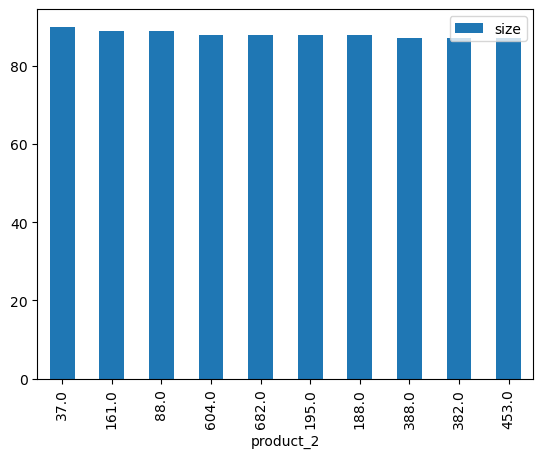

In [455]:
import matplotlib.pyplot as plt

pairs_counts.sort_values('size',ascending=False, inplace=True)
recommend_product = pairs_counts[pairs_counts["product_1"] == 46.0][0:10]

recommend_product.plot.bar(x="product_2",y="size")
plt.show()

Looks like every products have the same rate =))

# Collaborative recommendation

Now we will recommend based on others users who might have the most similar preferences

In [456]:
ratings.drop(['price','product_name'],axis=1,inplace=True)

Because there are many duplicates in our ratings, we will remove the duplicates before creating pivot dataframe

In [457]:
pivot_users_ratings = ratings.pivot(index='user_id', columns='product_id',values='rating')
pivot_users_ratings

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0
13874,5.0,NaN,5.0,NaN,4.0,NaN,NaN,3.0,5.0,5.0,...,3.0,5.0,3.0,NaN,5.0,NaN,NaN,3.0,3.0,5.0
13879,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,...,5.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
13885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,...,4.0,NaN,4.0,4.0,4.0,NaN,NaN,4.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0
103991,NaN,NaN,NaN,2.0,5.0,2.0,NaN,2.0,NaN,5.0,...,2.0,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN
103992,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0


Look at that, there are many NaN values -> not very ideal for our similarity metrics to operate, huh? We will do something about it. We first centering the users rating around 0 then fill 0s in the NaN

In [458]:
avg_ratings = pivot_users_ratings.mean(axis = 1)
pivot_users_ratings  = pivot_users_ratings.sub(avg_ratings, axis=0)
pivot_users_ratings = pivot_users_ratings.fillna(0)
pivot_users_ratings

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13874,0.715935,0.000000,0.715935,0.000000,-0.284065,0.000000,0.000000,-1.284065,0.715935,0.715935,...,-1.284065,0.715935,-1.284065,0.000000,0.715935,0.000000,0.000000,-1.284065,-1.284065,0.715935
13879,0.000000,-0.778426,-0.778426,0.000000,-0.778426,0.000000,0.000000,0.000000,0.000000,-0.778426,...,2.221574,0.000000,-0.778426,0.000000,0.000000,0.000000,-0.778426,0.000000,-0.778426,0.000000
13885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103991,0.000000,0.000000,0.000000,-1.540909,1.459091,-1.540909,0.000000,-1.540909,0.000000,1.459091,...,-1.540909,0.000000,0.000000,1.459091,-1.540909,0.000000,0.000000,0.000000,0.000000,0.000000
103992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now, let's change from User's Look to Products'Look =))) Then we will compare them all

In [459]:
pivot_products_ratings = pivot_users_ratings.T
pivot_products_ratings

user_id,3,6,13874,13879,13885,13892,14180,14486,14902,14906,...,103981,103982,103983,103985,103987,103988,103991,103992,103996,103997
product_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.715935,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.611814,0.0,0.0,-2.558376,0.0,0.000000,0.0,0.948031,0.0
2,0.0,0.0,0.000000,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.051969,0.0
3,0.0,0.0,0.715935,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,0.000000,0.0,0.000000,0.0,-2.051969,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,-2.558376,0.0,-1.540909,0.0,-0.051969,0.0
5,0.0,0.0,-0.284065,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,1.441624,0.0,1.459091,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.388186,0.0,0.0,-2.558376,0.0,0.000000,0.0,0.948031,0.0
688,0.0,0.0,0.000000,-0.778426,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.611814,0.0,0.0,-2.558376,0.0,0.000000,0.0,-0.051969,0.0
689,0.0,0.0,-1.284065,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.611814,0.0,0.0,1.441624,0.0,0.000000,0.0,0.948031,0.0


Hehehehehehe, we will use consine_similarity for now. Hheehehhe, I still feel so smooth =vvvv

In [460]:
from sklearn.metrics.pairwise import cosine_similarity

In [461]:
products_similarities = cosine_similarity(pivot_products_ratings)
products_similarities_df = pd.DataFrame(products_similarities, index = pivot_products_ratings.index, columns = pivot_products_ratings.index)
products_similarities_df

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.008118,0.033438,-0.113002,0.049991,-0.112487,-0.057874,0.061362,-0.070350,-0.035973,...,-0.064416,-0.170154,0.093201,0.044745,-0.123531,0.069409,-0.039648,0.017323,-0.101679,0.230484
2,0.008118,1.000000,-0.095739,0.062846,0.099779,0.015926,-0.103588,0.097638,0.042594,0.033609,...,0.227756,-0.058839,0.348725,-0.030298,-0.145607,0.085255,0.092699,0.025624,0.209434,-0.036319
3,0.033438,-0.095739,1.000000,-0.012175,0.086778,-0.061659,0.004456,-0.163360,-0.137981,0.020154,...,0.079142,0.076674,-0.162935,-0.158377,0.002665,0.142363,0.016033,-0.150570,-0.006451,0.083867
4,-0.113002,0.062846,-0.012175,1.000000,-0.039965,0.286333,-0.073940,-0.049076,0.054278,-0.078688,...,0.064976,-0.008429,0.147721,0.115700,0.193526,0.037033,0.129073,-0.052331,0.216473,0.017806
5,0.049991,0.099779,0.086778,-0.039965,1.000000,-0.282055,-0.176821,0.028218,0.106686,0.051969,...,-0.038249,0.099338,0.057600,0.054681,-0.216506,0.043628,0.102455,0.196840,0.220455,0.002235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.069409,0.085255,0.142363,0.037033,0.043628,0.021470,-0.102828,-0.065612,-0.112291,-0.027946,...,0.010684,-0.105391,-0.043206,0.111787,-0.032556,1.000000,0.010101,0.027378,0.107525,-0.029387
688,-0.039648,0.092699,0.016033,0.129073,0.102455,0.068313,0.017080,0.034125,0.154303,-0.158908,...,0.040108,0.068479,0.043207,-0.164533,0.151041,0.010101,1.000000,-0.236439,0.238270,-0.081231
689,0.017323,0.025624,-0.150570,-0.052331,0.196840,-0.095994,0.011617,-0.046560,-0.018702,0.008801,...,-0.037852,0.108665,0.028933,-0.022694,-0.083065,0.027378,-0.236439,1.000000,0.089797,0.104247


Let's make our predictions for the first 10 products, each one with the 10 highest values

In [462]:
for p in products.values[0:10]:
    productId=p[0]
    productName=p[1]
    result = products_similarities_df.loc[productId]
    order_result = result.sort_values(ascending=False)[:10]
    print("\t Recommend Product [", productName, "]")
    print( order_result)

	 Recommend Product [ Build your own computer ]
product_id
1      1.000000
222    0.324844
191    0.312517
573    0.304190
232    0.304113
368    0.290447
545    0.283265
11     0.282523
272    0.274173
66     0.269296
Name: 1, dtype: float64
	 Recommend Product [ Digital Storm VANQUISH 3 Custom Performance PC ]
product_id
2      1.000000
684    0.348725
112    0.299767
277    0.270740
552    0.261116
626    0.247516
658    0.242637
246    0.239748
682    0.227756
150    0.221152
Name: 2, dtype: float64
	 Recommend Product [ Lenovo IdeaCentre 600 All-in-One PC ]
product_id
3      1.000000
65     0.329283
354    0.323167
143    0.319320
272    0.316397
451    0.288199
449    0.262291
120    0.252100
291    0.246499
173    0.220209
Name: 3, dtype: float64
	 Recommend Product [ Apple MacBook Pro 13-inch ]
product_id
4      1.000000
535    0.304113
397    0.301831
518    0.295555
6      0.286333
236    0.277687
146    0.275033
210    0.263672
606    0.263503
135    0.258863
Name: 4, dtype:

***Now let's use KNN*** 
We want to predict how the user would rate the products. Which mean how likely it is for the user if they sell the product, find that it is good and make profit or the other round. First, we will find the similarity between users

In [463]:
similarities = cosine_similarity(pivot_users_ratings)
users_similarities_df = pd.DataFrame(similarities, index = pivot_users_ratings.index, columns = pivot_users_ratings.index)
users_similarities_df

user_id,3,6,13874,13879,13885,13892,14180,14486,14902,14906,...,103981,103982,103983,103985,103987,103988,103991,103992,103996,103997
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13874,0.0,0.0,1.000000,-0.029409,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.038740,0.0,0.0,-0.068114,0.0,0.051711,0.0,-0.054164,0.0
13879,0.0,0.0,-0.029409,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.044087,0.0,0.0,0.021147,0.0,-0.013943,0.0,-0.032589,0.0
13885,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
103991,0.0,0.0,0.051711,-0.013943,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.041710,0.0,0.0,0.054274,0.0,1.000000,0.0,-0.005679,0.0
103992,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


We find the 10 other users who might have similar experiences with user 1

In [464]:
user = users_similarities_df.loc[3]
order_similarities = user.sort_values(ascending = False)
nearest_neighbor = order_similarities[0:10].index
print(nearest_neighbor)

Index([3, 103730, 103747, 103745, 103744, 103743, 103741, 103737, 103736,
       103731],
      dtype='int64', name='user_id')


In [465]:
#Make a copy or else I will have to go up and down stairs waiting it run =))
null_pivot_users_ratings = ratings.pivot(index='user_id', columns='product_id',values='rating')
neighbor_ratings = null_pivot_users_ratings.reindex(nearest_neighbor)
#Let's see how how neighbors rate 683 product id
neighbor_ratings[683]

user_id
3         1.0
103730    NaN
103747    NaN
103745    NaN
103744    4.0
103743    NaN
103741    3.0
103737    NaN
103736    NaN
103731    NaN
Name: 683, dtype: float64

In [466]:
copy_pivot_users_ratings = pivot_users_ratings.copy()
copy_pivot_users_ratings

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13874,0.715935,0.000000,0.715935,0.000000,-0.284065,0.000000,0.000000,-1.284065,0.715935,0.715935,...,-1.284065,0.715935,-1.284065,0.000000,0.715935,0.000000,0.000000,-1.284065,-1.284065,0.715935
13879,0.000000,-0.778426,-0.778426,0.000000,-0.778426,0.000000,0.000000,0.000000,0.000000,-0.778426,...,2.221574,0.000000,-0.778426,0.000000,0.000000,0.000000,-0.778426,0.000000,-0.778426,0.000000
13885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103991,0.000000,0.000000,0.000000,-1.540909,1.459091,-1.540909,0.000000,-1.540909,0.000000,1.459091,...,-1.540909,0.000000,0.000000,1.459091,-1.540909,0.000000,0.000000,0.000000,0.000000,0.000000
103992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Suppose we want to predict the user 3's rating for product 683, we will do the following

In [467]:
# Drop the product we want to predict
copy_pivot_users_ratings.drop(683, axis=1,inplace=True)
#Seperate our user 3
target_user_x = copy_pivot_users_ratings.loc[[3]]
print(target_user_x)

product_id  1    2    3    4    5    6    7    8    9    10   ...  681  682  \
user_id                                                       ...             
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

product_id  684  685  686  687  688  689  690  691  
user_id                                             
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 690 columns]


In [468]:
other_users_y = null_pivot_users_ratings[683]
print(other_users_y)

user_id
3         1.0
6         1.0
13874     5.0
13879     NaN
13885     NaN
         ... 
103988    NaN
103991    NaN
103992    NaN
103996    5.0
103997    1.0
Name: 683, Length: 344, dtype: float64


We only care about the users who have retailed the products

In [469]:
other_users_x = copy_pivot_users_ratings[other_users_y.notnull()]
print(other_users_x)

product_id       1         2         3         4         5         6    \
user_id                                                                  
3           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13874       0.715935  0.000000  0.715935  0.000000 -0.284065  0.000000   
14906       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15042       0.000000 -1.214815 -1.214815  1.785185  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
103971      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103981      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103983      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
103996      0.948031 -0.051969 -2.051969 -0.051969  0.000000 -0.051969   
103997      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

product_id       7         8         

Now,we will drop the rows which rating is empty

In [470]:
other_users_y.dropna(inplace = True)
print(other_users_y)

user_id
3         1.0
6         1.0
13874     5.0
14906     4.0
15042     5.0
         ... 
103971    5.0
103981    1.0
103983    1.0
103996    5.0
103997    1.0
Name: 683, Length: 151, dtype: float64


In [471]:
from sklearn.neighbors import KNeighborsRegressor
user_knn = KNeighborsRegressor(metric='cosine', n_neighbors = 10)
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)
print(user_user_pred)

[2.8]


***Here, we see that user 3 might rate product 683 a value 2.3. Phiuuuuuu, we have made it! Let's party overnight. The mean of other users is 2.6, our user rate is 2.8 - which is slightly higher than his peers***

# Matrix Factorization

For sparsity data of course is ploblematic for KNN as it will not take similarities into account

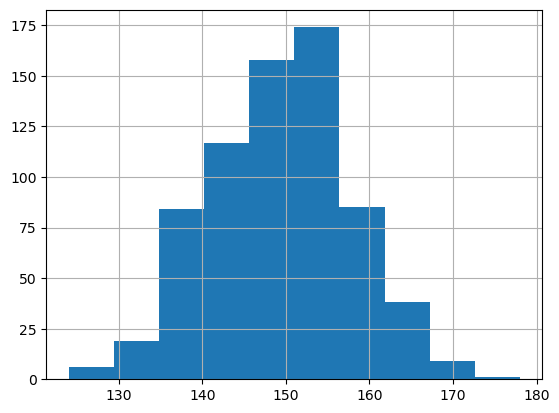

In [472]:
occupied_count = null_pivot_users_ratings.notnull().sum()
sorted_occupied_count = occupied_count.sort_values()
# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

In [473]:
number_of_empty = null_pivot_users_ratings.isnull().values.sum()
total_number = null_pivot_users_ratings.size
sparsity = number_of_empty / total_number
print(sparsity)

0.5658592198700906


***0.44 % of our dataset is filled***

In [474]:
avg_ratings = null_pivot_users_ratings.mean(axis = 1)
user_ratings_centered  = null_pivot_users_ratings.sub(avg_ratings, axis=0)
user_ratings_centered.fillna(0, inplace = True)
print(null_pivot_users_ratings.shape)
print(user_ratings_centered.shape)

(344, 691)
(344, 691)


In [475]:
# Import the required libraries 
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
import numpy as np
user_ratings_centered_sparse = csc_matrix(user_ratings_centered)
# Decompose the matrix
print(user_ratings_centered_sparse.shape)
U, sigma, Vt = svds(user_ratings_centered_sparse)

(344, 691)


In [476]:
print(U.shape)
print(Vt.shape)
print(sigma.shape)

(344, 6)
(6, 691)
(6,)


In [477]:
sigma = np.diag(sigma)
print(sigma)

[[45.62113818  0.          0.          0.          0.          0.        ]
 [ 0.         46.12892781  0.          0.          0.          0.        ]
 [ 0.          0.         47.24976724  0.          0.          0.        ]
 [ 0.          0.          0.         47.53629974  0.          0.        ]
 [ 0.          0.          0.          0.         49.32559927  0.        ]
 [ 0.          0.          0.          0.          0.         50.15416392]]


In [478]:
recalculated_ratings = np.dot(np.dot(U,sigma), Vt)

In [479]:
recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1,1)
print(recalculated_ratings.shape)

(344, 691)


In [480]:
pred_SVC = pd.DataFrame(recalculated_ratings, 
                        index=null_pivot_users_ratings.index,
                        columns=null_pivot_users_ratings.columns)

In [481]:
pred_SVC

product_id,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
user_id,,,,,,,,,,,,,,,,,,,,,
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
13874,4.239510,4.238286,4.371454,4.267592,4.226923,4.337019,4.205481,4.268958,4.259358,4.294306,...,4.274150,4.375474,4.096390,4.248117,4.267352,4.319587,4.290300,4.219831,4.214674,4.250349
13879,2.782496,2.666429,2.850443,2.664902,2.747350,2.786204,2.764157,2.703605,2.694041,2.773452,...,2.695962,2.838692,2.571030,2.758022,2.696080,2.717713,2.652219,2.803877,2.649967,2.839172
13885,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
103991,3.631979,3.501914,3.616102,3.294937,3.662871,3.478056,3.456111,3.616244,3.260312,3.723882,...,3.486479,3.514455,3.330103,3.582336,3.251312,3.431167,3.280934,3.635531,3.437324,3.632255
103992,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [482]:
user_13879_ratings = pred_SVC.loc[13879,:].sort_values(ascending=False)
print(user_13879_ratings)

product_id
140    2.927585
275    2.921802
441    2.919416
79     2.917096
440    2.914593
         ...   
180    2.605710
460    2.601917
335    2.601620
112    2.577474
684    2.571030
Name: 13879, Length: 691, dtype: float64


In [483]:
for c in customers.values[400:410]:
    customerId=c[0]
    customerName=c[1]
    print("Customer [",customerId,customerName,"], Recommendation products:")
    user_3_ratings = pred_SVC.loc[3,:].sort_values(ascending=False)[:10]
    idxs = list(user_3_ratings.index)
    for idx in idxs:
            p = products.values[idx-1]
            productId=p[0]
            productName=p[1]
            print("\tRecommend Product {}".format(productName))

Customer [ 103508 nhiennta ], Recommendation products:
	Recommend Product Escape Room
	Recommend Product Short Jeans 01
	Recommend Product TÊN SẢN PHẦM
	Recommend Product Cam Canh Hà Nội
	Recommend Product Samsung Galaxy Z Fold3 5G 256GB
	Recommend Product Everything You Are Diamond Heart Necklace 1/2 ct tw 10K White Gold 18"
	Recommend Product Twist Hoop Earrings 14K Yellow Gold 20mm
	Recommend Product Diamond Heart Boxed Set 1/2 ct tw Sterling Silver
	Recommend Product Heart Necklace 1/15 ct tw Diamonds Sterling Silver/10K Gold
	Recommend Product Diamond Heart Ring 1/20 ct tw Sterling Silver
Customer [ 103886 nhonx ], Recommendation products:
	Recommend Product Escape Room
	Recommend Product Short Jeans 01
	Recommend Product TÊN SẢN PHẦM
	Recommend Product Cam Canh Hà Nội
	Recommend Product Samsung Galaxy Z Fold3 5G 256GB
	Recommend Product Everything You Are Diamond Heart Necklace 1/2 ct tw 10K White Gold 18"
	Recommend Product Twist Hoop Earrings 14K Yellow Gold 20mm
	Recommend Pro

***Second Choice***

In [484]:
recommend =pd.read_json("data/ratings.json")
recommend.drop("CreateDate",inplace = True, axis=1)
recommend

,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5
...,...,...,...
130749,103907,501,1
130750,103907,200,1
130751,103907,184,1
130752,103907,211,1


In [485]:
customers=pd.read_json("data/customers.json")
customers

,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [486]:
products=pd.read_json("data/products.json")

In [487]:
class MatrixFactorization(object):
    def __init__(self, Y,customers,products, K, lam = 0.1, Xinit = None, Winit = None, learning_rate = 0.5, max_iter = 1000, print_every = 100):
        self.Y = Y # represents the utility matrix
        self.K = K
        self.lam = lam # regularization parameter
        self.learning_rate = learning_rate # for gradient descent
        self.max_iter = max_iter # maximum number of iterations
        self.print_every = print_every # print loss after each a few iters
        self.customers=customers
        self.products=products
        self.n_users = int(np.max(Y[:, 0])) + 1
        self.n_items = int(np.max(Y[:, 1])) + 1
        #self.n_users = customers.size
        #self.n_items = products.size
        self.n_ratings = Y.shape[0] # number of known ratings
        self.X = np.random.randn(self.n_items, K) if Xinit is None\
        else Xinit
        self.W = np.random.randn(K, self.n_users) if Winit is None\
        else Winit
        self.b = np.random.randn(self.n_items) # item biases
        self.d = np.random.randn(self.n_users) # user biases
    def loss(self):
        L = 0
        for i in range(self.n_ratings):
            # user_id, item_id, rating
            n, m, rating = int(self.Y[i,0]), int(self.Y[i,1]), self.Y[i,2]
            L += 0.5*(self.X[m].dot(self.W[:, n])\
            + self.b[m] + self.d[n] - rating)**2
        L /= self.n_ratings
        # regularization, don’t ever forget this
        return L + 0.5*self.lam*(np.sum(self.X**2) + np.sum(self.W**2))
    def updateXb(self):
        products = np.array(self.products["Id"])
        for m in range(0,products.size):
            pId = products[m]
            # get all users who rated item m and corresponding ratings
            ids = np.where(self.Y[:, 1] == pId)[0] # row indices of items m
            if ids.size>0:
                user_ids, ratings=self.Y[ids, 0].astype(np.int32),self.Y[ids, 2]
                Wm, dm = self.W[:, user_ids], self.d[user_ids]
                for i in range(30): # 30 iteration for each sub problem
                    xm = self.X[m]
                    error = xm.dot(Wm) + self.b[m] + dm - ratings
                    grad_xm = error.dot(Wm.T)/self.n_ratings + self.lam*xm
                    grad_bm = np.sum(error)/self.n_ratings
                    # gradient descent
                    self.X[m] -= self.learning_rate*grad_xm.reshape(-1).astype('float64')
                    self.b[m] -= self.learning_rate*grad_bm
    def updateWd(self): # and d
        customers = np.array(self.customers["Id"])
        for n in range(0,customers.size):
            custId=customers[n]
            # get all items rated by user n, and the corresponding ratings
            ids = np.where(self.Y[:,0] == custId)[0] #indexes of items rated by n
            if ids.size>0:
                item_ids,ratings=self.Y[ids, 1].astype(np.int32), self.Y[ids, 2]
                Xn, bn = self.X[item_ids], self.b[item_ids]
                for i in range(30): # 30 iteration for each sub problem
                    wn = self.W[:, n]
                    error = Xn.dot(wn) + bn + self.d[n] - ratings
                    grad_wn = Xn.T.dot(error)/self.n_ratings + self.lam*wn
                    grad_dn = np.sum(error)/self.n_ratings
                    grad_dn=grad_dn
                    # gradient descent
                    self.W[:, n] -= self.learning_rate*grad_wn.reshape(-1).astype('float64')
                    self.d[n] -= self.learning_rate*grad_dn
    def fit(self):
        for it in range(self.max_iter):
            self.updateWd()
            self.updateXb()
            if (it + 1) % self.print_every == 0:
                rmse_train = self.evaluate_RMSE(self.Y)
                print("iter = %d, loss = %.4f, RMSE train = %.4f"%(it + 1,
                self.loss(), rmse_train))
    def predict(self, u, i):
        """
        predict the rating of user u for item i
        """
        try:
            u, i = int(u), int(i)
            pred = self.X[i, :].dot(self.W[:, u]) + self.b[i] + self.d[u]
            return max(0, min(5, pred))  # 5-scale in Ecommerce
        except:
            return  0        
    def evaluate_RMSE(self, rate_test):
        n_tests = rate_test.shape[0] # number of test
        SE = 0 # squared error
        for n in range(n_tests):
            pred = self.predict(rate_test[n, 0], rate_test[n, 1])
            SE += (pred - rate_test[n, 2])**2
        RMSE = np.sqrt(SE/n_tests)
        return RMSE

In [488]:
rate_train =recommend[0:129000]
rate_train = np.array(rate_train)
rate_test = recommend[129001:]
rate_test= np.array(rate_test)
print('Number of traing rates:', rate_train.shape[0])
print('Number of test rates:', rate_test.shape[0])

Number of traing rates: 129000
Number of test rates: 1753


In [489]:
# indices start from 0
rate_train[:, :2] -= 1
rate_test[:, :2] -= 1
mf = MatrixFactorization(rate_train,customers,products,K = 50, lam = .01, print_every = 5, learning_rate = 50,max_iter = 30)
mf.fit()
# evaluate on test data
RMSE = mf.evaluate_RMSE(rate_test)
print("\nMatrix Factorization CF, RMSE = %.4f" %RMSE)

iter = 5, loss = 25912.3171, RMSE train = 1.7685
iter = 10, loss = 25912.3171, RMSE train = 1.7684
iter = 15, loss = 25912.3171, RMSE train = 1.7684
iter = 20, loss = 25912.3171, RMSE train = 1.7684
iter = 25, loss = 25912.3171, RMSE train = 1.7684
iter = 30, loss = 25912.3171, RMSE train = 1.7684

Matrix Factorization CF, RMSE = 1.8920


In [490]:
expected_score=3.8
print("Expected Score =",expected_score)
for c in customers.values[0:10]:
    customerId=c[0]
    customerName=c[1]
    print("Customer [",customerId,customerName,"], recommendation products:")
    for p in products.values:
        productId=p[0]
        productName=p[1]
        result=mf.predict(customerId,productId)
        if result>=expected_score:
            print("\t Recommend Product [",productName, "] Score=",result)

Expected Score = 3.8
Customer [ 103603 1000kgthanh ], recommendation products:
	 Recommend Product [ Ponyo ] Score= 5
Customer [ 103760 999999999ok ], recommendation products:
Customer [ 103829 ac7ive ], recommendation products:
	 Recommend Product [ Build your own computer ] Score= 4.031560044842884
	 Recommend Product [ Digital Storm VANQUISH 3 Custom Performance PC ] Score= 4.148534965425368
	 Recommend Product [ Lenovo IdeaCentre 600 All-in-One PC ] Score= 3.966975521344255
	 Recommend Product [ Asus N551JK-XO076H Laptop ] Score= 3.943657483530148
	 Recommend Product [ Samsung Series 9 NP900X4C Premium Ultrabook ] Score= 3.874288439867827
	 Recommend Product [ HP Spectre XT Pro UltraBook ] Score= 3.9273680623083105
	 Recommend Product [ HP Envy 6-1180ca 15.6-Inch Sleekbook ] Score= 4.010677826627609
	 Recommend Product [ Sound Forge Pro 11 (recurring) ] Score= 3.829366264342178
	 Recommend Product [ Nikon D5500 DSLR - Red ] Score= 3.8084197963229727
	 Recommend Product [ Leica T Mi